In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conflicts = pd.read_csv('conflicts_and_wars_202403110030.csv', delimiter=',')
nuclear_stockpiles = pd.read_csv('nuclear_weapon/nuclear_weapons_stockpiles.csv', delimiter=',')
display(conflicts.tail(),nuclear_stockpiles.tail())

,Date,Headline,Conflict Type,Country,Region,Description,Sources
922,2019,One Israeli killed and two others injured at a...,Trigger,Palestine,Western Asia,"A homemade bomb explodes at a spring, killing ...",Chronicle News Service 2019
923,2019,"50,000 people flee their homes in central Mali...",Trigger,Mali,Sub-Saharan Africa,"A series of massacres in central Mali, fueled ...",Webb 2019
924,2019,Violence in northwest Syria damages civilian i...,Casualty,Syria,Western Asia,From January through July 2019 violence in nor...,US Agency for International Development 2019
925,2019,"Shrapnel damages a water pipeline, leaving mor...",Casualty,Ukraine,Eastern Europe,Shrapnel from an exploding shells damages a pi...,UNICEF 2019
926,2022,Conflict in Ukraine,Weapon,"Keiv,Ukraine",Eastern Europe,The Russo-Ukrainian War is an ongoing war prim...,UNICEF 2020


,country_name,year,nuclear_weapons_stockpile
775,United States,2018,3785
776,United States,2019,3805
777,United States,2020,3750
778,United States,2021,3708
779,United States,2022,3708


In [3]:
## Are regions that have historicaly been more violent  more likely to have nuclear powers?

To understand violence by region, it is necessary for the nuclear_stockpiles DataFrame to have a region indicating what region each country belongs to so it's possible to correlate with the already defined region in the conflicts DataFrame.

In [4]:
country_to_region = dict(zip(conflicts['Country'], conflicts['Region']))

nuclear_stockpiles['Region'] = nuclear_stockpiles['country_name'].map(country_to_region)
nuclear_stockpiles.tail()

,country_name,year,nuclear_weapons_stockpile,Region
775,United States,2018,3785,North America
776,United States,2019,3805,North America
777,United States,2020,3750,North America
778,United States,2021,3708,North America
779,United States,2022,3708,North America


Histogram: X = Violence, Y = number of nuclear states

In [5]:
violence_region_series = conflicts.groupby('Region')['Region'].count()
violence_region_series

Region
*Western Asia                                                                                                        1
Australia and New Zealand                                                                                            2
Central Asia                                                                                                        15
Eastern Asia                                                                                                        27
Eastern China                                                                                                        1
Eastern Europe                                                                                                      28
Hundreds of residents and municipal union members protest the lack of free water in their town in South Africa.      1
Latin America & the Caribbean                                                                                        2
Latin America and the Ca                 

In [6]:
nuclear_states_dict = dict(nuclear_stockpiles.groupby('Region')['country_name'].nunique())

In [7]:
del violence_region_series['*Western Asia']
del violence_region_series['Latin America and the Ca']
violence_region_series['Latin American and the Caribbean'] = 27+36
del nuclear_states_dict['Sub-Saharan Africa']
nuclear_states_dict['Western Europe'] = 2
nuclear_states_series = pd.Series(nuclear_states_dict)
nuclear_states_series

Eastern Asia      2
Eastern Europe    1
North America     1
Southern Asia     2
Western Asia      1
Western Europe    2
dtype: int64

In [8]:
extra_region_list = ['Australia and New Zealand','Central Asia','Eastern China','Hundreds of residents and municipal union members protest the lack of free water in their town in South Africa.','Latin America & the Caribbean','Latin America and the Caribbean','Melanesia','Northern Africa','Northern Asia','Northern Europe','South-eastern Asia','Southeast Asia','Southern Europe','Sub-Saharan Africa','Western Asia','Southwest Asia']
for region in extra_region_list:
    if region not in nuclear_states_series:
        nuclear_states_series[region] = 0

[]

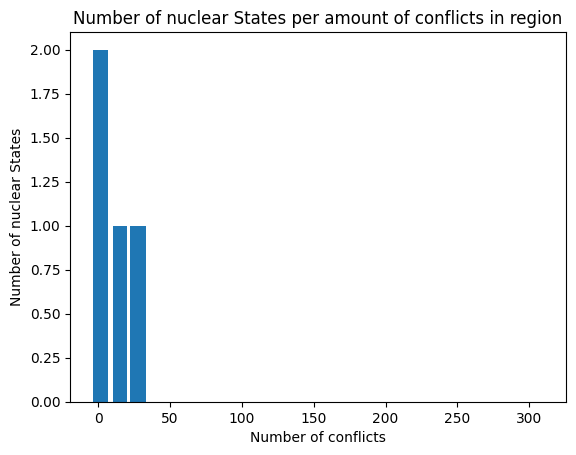

In [9]:
plt.bar(violence_region_series, nuclear_states_series, width = 10, align = 'center')
plt.title('Number of nuclear States per amount of conflicts in region')
plt.xlabel('Number of conflicts')
plt.ylabel('Number of nuclear States')
plt.plot()

Question: Are regions that have historicaly been more violent  more likely to have nuclear powers?
Apparent answer: Although it appears hard to directly correlate violence in a region to existence of nations possessing nuclear power, it appears that the opposite happened, regions with less war have spawned a larger number of nuclear powers. It is however important to take a few things into consideration: Firstly, the nuclear power of North America has experienced relatively few conflicts due to it's short existence, being freed in 1776, secondly the unique social structure of China, which emphasized isolationism and thirdly the division of Europe into many smaller regions, making so that conflicts that involved many nations in the continent appear to involve only a small region.

## Are nuclear States more likely to go to war with non-nuclear States?

In [48]:
nuclear_nations = [nation for nation in nuclear_stockpiles.country_name.unique() if 'South Africa' not in nation]

In [49]:
nuclear_nations

['China',
 'France',
 'India',
 'Israel',
 'North Korea',
 'Pakistan',
 'Russia',
 'United Kingdom',
 'United States']

In [50]:
conflicts_with_nuclear_nations = [nation for nation in conflicts.Country if nation.split(', ')[0] in nuclear_nations]

In [51]:
conflicts_with_nuclear_nations

['China',
 'China, Japan',
 'India',
 'China',
 'China',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'China, Japan',
 'China, Japan',
 'France',
 'France, Germany',
 'India, Pakistan',
 'North Korea',
 'North Korea',
 'Israel, Jordan, Syria',
 'North Korea',
 'Israel, Jordan, Syria',
 'Israel, Syria',
 'Israel, Syria',
 'Israel, Palestine',
 'Israel, Jordan, Syria',
 'United States',
 'Israel, Jordan',
 'United States',
 'Israel, Jordan',
 'United States',
 'China',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'China',
 'United States',
 'United States',
 'United States',
 'Israel',
 'United States',
 'United States',
 'United States',
 'North Korea, South Korea',
 'Pakistan',
 'United States',
 'Israel',
 'China',
 'India',
 'China',


Question: Are nuclear States more likely to go to war with non-nuclear States?
Apparent answer: Although nuclear states appear to not go to war more often than non-nuclear states, all wars that involved nuclear nations were with non-nuclear countries. The only conflicts between nuclear countries happen between India and Pakistan.